In [14]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


#create imporsonment data url
Imprisonment_baseUrl = "https://api.ed.gov/data/mbk-imprisonment?"
Imprisonment_apiKey = "api_key=DTeVODnGRjLME8jd6PQCOy1DpgLqXPdHWtGO4EqA"
Imprisonment_perPage = "per_page=" + "195"
Imprisonment_url = Imprisonment_baseUrl + Imprisonment_apiKey + "&" + Imprisonment_perPage

#request and get data as "ImprisonmentData" through url
ImprisonmentData = requests.get(Imprisonment_url).json()



In [152]:
Imprisonment_length = len(ImprisonmentData["resources"])

YearList = [] 
RaceEthnicityList = []
SexLists = []
CountList = []
CountPerCapitaList = []

#pull all data from requested data and put into lists for each column
for i in range (Imprisonment_length):
    YearList.append(int(ImprisonmentData["resources"][i]["Year"]))
    RaceEthnicityList.append(ImprisonmentData["resources"][i]["Race/ethnicity"])
    SexLists.append(ImprisonmentData["resources"][i]["Sex"])
    CountList.append(int(ImprisonmentData["resources"][i]["Count"]))
    CountPerCapitaList.append(int(ImprisonmentData["resources"][i]["Rate per 100,000"]))
        #YearList

#create dataframe and input all lists
imprisonmentDf = pd.DataFrame({
    "Year" : YearList,
    "Race/Ethnicity" : RaceEthnicityList,
    "Sex" : SexLists,
    "Count" : CountList,
    "Per Capita Rate per 100,000" : CountPerCapitaList
})

#show imporinment dataframe
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True)
imprisonmentDf.head()
        


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
0,2000,None,None,218896,791
1,2001,None,None,219439,777
2,2002,None,None,220072,766
3,2003,None,None,218436,750
4,2004,None,None,207416,707


In [147]:
#initilize race list
raceList = []
#populate race list with unique races
raceList = imprisonmentDf["Race/Ethnicity"].unique()
#show unique races
raceList

array([None, 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic',
       'Other race, non-Hispanic'], dtype=object)

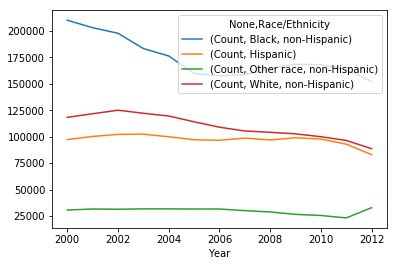

In [154]:
imprisonmentDf_yearSum = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Count"].sum())
imprisonmentDf_yearSum.unstack(level=-1).plot(kind="line", legend=True)#, xticks=imprisonmentDf_yearSum.index)



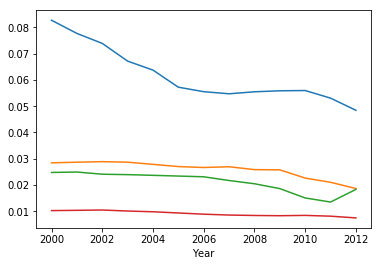

In [159]:
#imprisonmentDf_yearSum.plot(kind='bar')
imprisonmentDf_yearSum = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Per Capita Rate per 100,000"].sum()/100000)
imprisonmentDf_yearSum.unstack(level=-1).plot(kind="line", legend=False)#, xticks=imprisonmentDf_yearSum.index)



In [ ]:
plt.plot(x_axis, sin_X)
